# Qiskit Examples

In this section we present some examples of Qiskit implementations fo the concepts introduced in the single systems lesson

#### Vectors and matrices in Python

Qiskit uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the array class from the NumPy library (which includes many additional components for numerical computation).

Here is an example of a code cell that defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors ∣0⟩ and ∣1⟩, and displays their average.


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

This code cell also illustrates that running code cells sequentially on a given page of this textbook has a cumulative effect, so it is not necessary to reload the array class or define ket0 and ket1 again. Reloading the page or switching to another page will, however, reset everything to its initial state.

As a general guideline, code cells within each subsection of this course are intended to be run sequentially. So, if running a code cell generates an error, be sure to first run all previous code cells within the subsection in which that code cell appears.

We can also use array to create matrices that represent operations.

In [3]:
from numpy import array

M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy :

In [4]:
from numpy import matmul

ket0 = array([1, 0])
ket1 = array([0, 1])

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

#### States, measurements, and operations

Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated - so starting from scratch and prgramming eeverything that is needed to simulate quantum states, measurements and operations in Python is not required. Some examples to get started are included below.

##### Defining and displaying state vectors

Qiskit's Statevector class prvides functionality for defining and manipulating quantum state vectors. The following code cell imports the Statevector class and defines a few vectors using it.

pip install qiskit

In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The Statevector class provides a draw method for displaying state vectors, including latex and text options for different visualizations, as this code cell demonstrates:

In [2]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The Statevector class also includes the is_valid method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [3]:
display(u.is_valid())
display(w.is_valid())

True

False

##### Simulating measurements using Statevector

Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class.

First, we create a qubit state vector v and then display it.

In [5]:
from qiskit.quantum_info import Statevector

v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

In [8]:
v.measure()

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results.


Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector v 10001000 times, which (with high probability) results in the outcome 0 approximately 5 out of every 9 times (or about 556 of the 1000 trials) and the the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials). The cell also demonstrates the plot_histogram function for visualizing the results.

pip install matplotlib

{np.str_('0'): np.int64(566), np.str_('1'): np.int64(434)}

Matplotlib is building the font cache; this may take a moment.


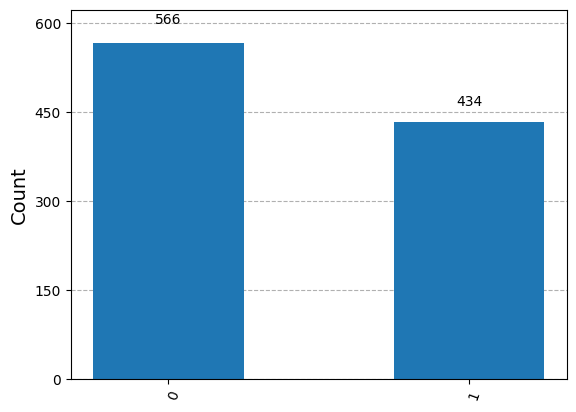

In [2]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

v = Statevector([(1 + 2.0j) / 3, -2 / 3])
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

##### Performing operations with Operator and Statevector

Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [3]:
from qiskit.quantum_info import Operator, Statevector
from numpy import sqrt

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

##### Looking ahead toward quantum circuits

We may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed ona single quibit) as follows.

In [4]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vecotr and then evolve that state according to the sequence of operations.

In [5]:
from qiskit.quantum_info import Statevector

ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally let's simulate the result of running this experiment (i.e., preparing the state |0>, applying the sequence of operations represented by the circuit, eand measuring) 4000 times.

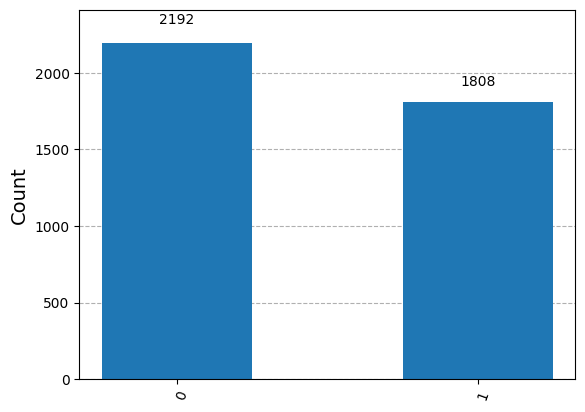

In [6]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

v = Statevector([(1 + 2.0j) / 3, -2 / 3])
statistics = v.sample_counts(4000)
plot_histogram(statistics)